In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
deliv= pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [3]:
match.sample(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
661,7919,IPL-2018,Delhi,27-04-2018,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Delhi Daredevils,55,0,SS Iyer,Feroz Shah Kotla,C Shamshuddin,S Ravi,A Nanda Kishore
477,478,IPL-2014,Ranchi,02-05-2014,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,34,0,RA Jadeja,JSCA International Stadium Complex,AK Chaudhary,NJ Llong,NaN
660,7918,IPL-2018,Hyderabad,26-04-2018,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,13,0,AS Rajpoot,"Rajiv Gandhi International Stadium, Uppal",O Nandan,Yeshwant Barde,Rod Tucker
681,7939,IPL-2018,Pune,13-05-2018,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,AT Rayudu,Maharashtra Cricket Association Stadium,Marais Erasmus,Yeshwant Barde,Anil Dandekar
542,543,IPL-2015,Delhi,26-04-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN


In [4]:
match.shape

(756, 18)

In [5]:
deliv.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20198,86,2,Mumbai Indians,Rajasthan Royals,12,1,DJ Bravo,RV Uthappa,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
45607,194,1,Chennai Super Kings,Mumbai Indians,7,3,SK Raina,S Badrinath,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
75159,319,2,Rajasthan Royals,Mumbai Indians,6,5,OA Shah,AM Rahane,PP Ojha,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
57854,245,1,Deccan Chargers,Royal Challengers Bangalore,7,3,KC Sangakkara,S Sohal,S Aravind,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4385,19,1,Sunrisers Hyderabad,Kings XI Punjab,12,5,NV Ojha,DA Warner,AR Patel,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [6]:
deliv.shape

(179078, 21)

In [7]:
deliv.groupby(['match_id', 'inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [8]:
total_score = deliv.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [9]:
total_score.sample(5)

,match_id,inning,total_runs
182,91,1,181
1495,11336,2,167
22,12,1,142
1302,7903,1,145
71,35,2,68


In [10]:
total_score.shape

(1528, 3)

In [11]:
total_score = total_score[total_score['inning']==1]

In [12]:
match_new = match.merge(total_score[['match_id', 'total_runs']], left_on='id', right_on='match_id')

In [13]:
match_new.sample(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
454,455,IPL-2013,Delhi,22-05-2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN,455,132
320,321,IPL-2012,Chandigarh,12-04-2012,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,AD Mascarenhas,"Punjab Cricket Association Stadium, Mohali",VA Kulkarni,SK Tarapore,NaN,321,115
409,410,IPL-2013,Chennai,22-04-2013,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,5,MEK Hussey,"MA Chidambaram Stadium, Chepauk",S Asnani,AK Chaudhary,NaN,410,185
403,404,IPL-2013,Delhi,18-04-2013,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,86,0,MEK Hussey,Feroz Shah Kotla,M Erasmus,VA Kulkarni,NaN,404,169
33,34,IPL-2017,Rajkot,29-04-2017,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN,34,153


In [14]:
match_new['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
teams = ['Sunrisers Hyderabad',
         'Mumbai Indians',
         'Gujarat Titans',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals',
         'Royal Challengers Bangalore'
        ]

In [16]:
match_new['team1'] = match_new['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_new['team2'] = match_new['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_new['team1'] = match_new['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_new['team2'] = match_new['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

match_new['team1'] = match_new['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
match_new['team2'] = match_new['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [17]:
match_new = match_new[match_new['team1'].isin(teams)]
match_new = match_new[match_new['team2'].isin(teams)]

In [18]:
match_new.shape

(667, 20)

In [19]:
match_new.sample(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
228,229,IPL-2010,Delhi,18-04-2010,Sunrisers Hyderabad,Delhi Capitals,Deccan Chargers,bat,normal,0,Deccan Chargers,11,0,A Symonds,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN,229,145
692,7950,IPL-2018,Mumbai,22-05-2018,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi,7950,148
22,23,IPL-2017,Kolkata,21-04-2017,Kolkata Knight Riders,Gujarat Titans,Gujarat Lions,field,normal,0,Gujarat Lions,0,4,SK Raina,Eden Gardens,CB Gaffaney,Nitin Menon,NaN,23,187
185,186,IPL-2010,Cuttack,19-03-2010,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Deccan Chargers,6,0,A Symonds,Barabati Stadium,BF Bowden,M Erasmus,NaN,186,170
376,377,IPL-2012,Jaipur,20-05-2012,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN,377,162


In [20]:
match_new = match_new[['match_id', 'city', 'winner', 'total_runs']]

In [21]:
deliv_new = match_new.merge(deliv, on='match_id')

In [22]:
deliv_new = deliv_new[deliv_new['inning']==2]

In [23]:
deliv_new

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158200,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
158201,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
158202,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
158203,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [24]:
deliv_new['curr_score'] = deliv_new.groupby('match_id').cumsum()['total_runs_y']

In [25]:
deliv_new.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'curr_score'],
      dtype='object')

In [26]:
deliv_new['runs_left'] = deliv_new['total_runs_x'] - deliv_new['curr_score']

In [27]:
deliv_new.sample(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,curr_score,runs_left
53179,243,Chandigarh,Kings XI Punjab,188,2,Kings XI Punjab,Chennai Super Kings,2,4,PC Valthaty,...,0,0,0,0,0,NaN,NaN,NaN,13,175
69828,347,Chennai,Kolkata Knight Riders,139,2,Kolkata Knight Riders,Chennai Super Kings,7,4,JH Kallis,...,0,0,1,0,1,NaN,NaN,NaN,40,99
68120,338,Jaipur,Royal Challengers Bangalore,189,2,Rajasthan Royals,Royal Challengers Bangalore,10,1,R Dravid,...,0,0,0,0,0,NaN,NaN,NaN,59,130
28104,137,Centurion,Chennai Super Kings,164,2,Rajasthan Royals,Chennai Super Kings,13,1,RA Jadeja,...,0,0,2,0,2,NaN,NaN,NaN,81,83
57867,276,Chennai,Chennai Super Kings,147,2,Chennai Super Kings,Rajasthan Royals,18,4,MEK Hussey,...,0,0,1,0,1,NaN,NaN,NaN,140,7


In [28]:
deliv_new['balls_left'] = 126 - (deliv_new['over']*6 + deliv_new['ball'])

In [29]:
deliv_new

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,curr_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158200,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
158201,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
158202,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
158203,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [30]:
deliv_new['player_dismissed'] = deliv_new['player_dismissed'].fillna("0")
deliv_new['player_dismissed'] = deliv_new['player_dismissed'].apply(lambda x:x if x == "0" else "1")
deliv_new['player_dismissed'] = deliv_new['player_dismissed'].astype('int')
wickets = deliv_new.groupby('match_id').cumsum()['player_dismissed'].values
deliv_new['wickets'] = 10 - wickets
deliv_new.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,curr_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [31]:
deliv_new['CRR'] = (deliv_new['curr_score']*6)/(120-deliv_new['balls_left'])

In [32]:
deliv_new['RRR'] = (deliv_new['runs_left']*6)/deliv_new['balls_left']

In [33]:
deliv_new

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,curr_score,runs_left,balls_left,wickets,CRR,RRR
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158200,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,4,5,7.862069,0.000000
158201,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000
158202,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000
158203,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000


In [34]:
def winner(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [35]:
deliv_new['Winner'] = deliv_new.apply(winner, axis=1)

In [36]:
deliv_new.sample(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,curr_score,runs_left,balls_left,wickets,CRR,RRR,Winner
137153,7925,Delhi,Delhi Daredevils,203,2,Rajasthan Royals,Delhi Daredevils,11,1,RA Tripathi,...,0,NaN,NaN,124,79,59,6,12.196721,8.033898,0
42626,197,Bangalore,Delhi Daredevils,183,2,Royal Challengers Bangalore,Delhi Daredevils,6,3,JH Kallis,...,0,NaN,NaN,41,142,87,10,7.454545,9.793103,0
68427,340,Chandigarh,Mumbai Indians,168,2,Mumbai Indians,Kings XI Punjab,19,2,RJ Peterson,...,0,NaN,NaN,145,23,10,4,7.909091,13.800000,1
23253,116,Mumbai,Chennai Super Kings,112,2,Chennai Super Kings,Kings XI Punjab,12,5,PA Patel,...,0,NaN,NaN,78,34,49,9,6.591549,4.163265,1
113727,554,Chennai,Chennai Super Kings,148,2,Royal Challengers Bangalore,Chennai Super Kings,17,6,D Wiese,...,0,NaN,NaN,112,36,18,4,6.588235,12.000000,0


In [37]:
final = deliv_new[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','CRR','RRR', 'Winner']]

In [38]:
final.sample(5)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,CRR,RRR,Winner
3241,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,144,109,9,159,8.181818,7.926606,0
137805,Chennai Super Kings,Royal Challengers Bangalore,Pune,79,78,9,131,7.428571,6.076923,1
55336,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,157,106,10,171,6.000000,8.886792,1
151817,Sunrisers Hyderabad,Chennai Super Kings,Hyderabad,70,84,9,139,11.500000,5.000000,1
149894,Chennai Super Kings,Rajasthan Royals,Jaipur,106,58,6,158,5.032258,10.965517,1


In [39]:
final['batting_team'] = final['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
final['bowling_team'] = final['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')

final['batting_team'] = final['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
final['bowling_team'] = final['bowling_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

final['batting_team'] = final['batting_team'].str.replace('Gujarat Lions', 'Gujarat Titans')
final['bowling_team'] = final['bowling_team'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [40]:
final = final[final['batting_team'].isin(teams)]
final = final[final['bowling_team'].isin(teams)]

In [41]:
final = final[final['balls_left']!=0]

In [42]:
final.shape

(75983, 10)

In [43]:
X = final.drop(columns='Winner', axis=1)
Y = final['Winner']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42 )

In [45]:
X_train, Y_train

(                       batting_team                 bowling_team       city  \
 145779          Sunrisers Hyderabad             Rajasthan Royals  Hyderabad   
 30052               Kings XI Punjab             Rajasthan Royals     Durban   
 155176               Mumbai Indians        Kolkata Knight Riders    Kolkata   
 126447               Gujarat Titans  Royal Challengers Bangalore  Bangalore   
 135953               Mumbai Indians          Chennai Super Kings       Pune   
 ...                             ...                          ...        ...   
 77618           Sunrisers Hyderabad  Royal Challengers Bangalore  Hyderabad   
 13471   Royal Challengers Bangalore          Chennai Super Kings  Bangalore   
 114422              Kings XI Punjab  Royal Challengers Bangalore  Bangalore   
 1859          Kolkata Knight Riders              Kings XI Punjab    Kolkata   
 33402   Royal Challengers Bangalore          Chennai Super Kings     Durban   
 
         runs_left  balls_left  wicket

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('ONE',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

## EDA

In [47]:
final.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'CRR', 'RRR', 'Winner'],
      dtype='object')

In [48]:
import plotly.express as px

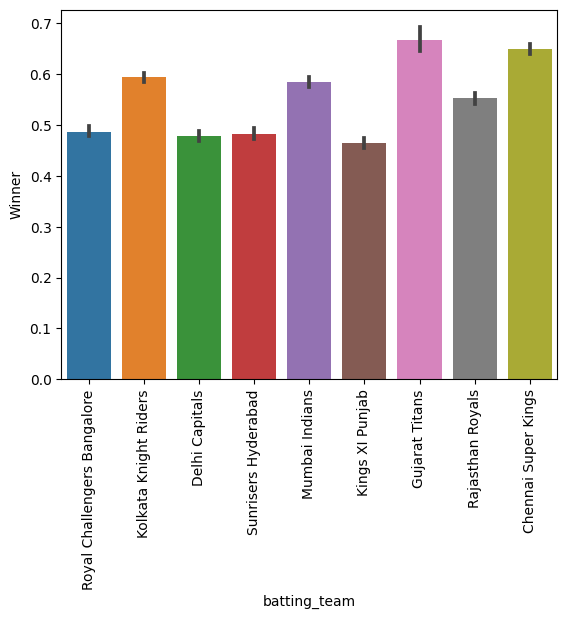

In [49]:
sns.barplot(x=final['batting_team'], y=final['Winner'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

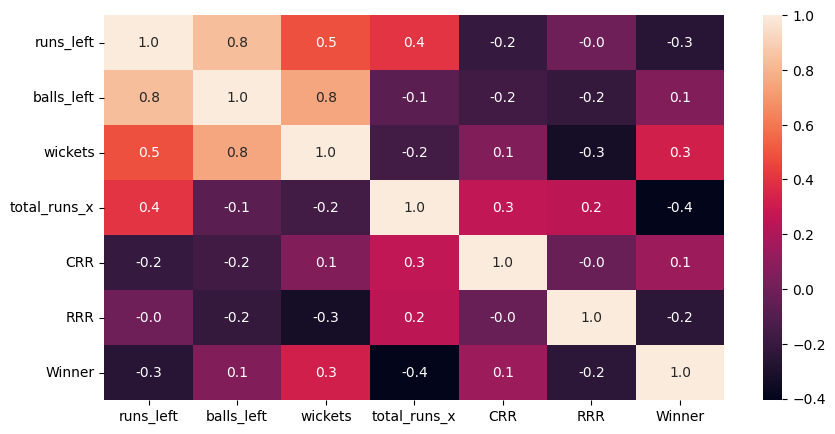

In [50]:
plt.figure(figsize = (10, 5))
sns.heatmap(final.corr(), annot=True, fmt='0.1f') 

## Model Selection

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [52]:
from sklearn.linear_model import LogisticRegression as LR

In [53]:
s1 = LR(solver='liblinear')

pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', s1)
])

pipe.fit(X_train, Y_train)

y_pred1 = pipe.predict(X_test)

print("Accuracy Score: ", accuracy_score(Y_test,y_pred1))
print("Precision Score: ", precision_score(Y_test, y_pred1))
print("Recall Score: ", recall_score(Y_test, y_pred1))
print("F1 Score: ", f1_score(Y_test, y_pred1))
print("Probability is: ", pipe.predict_proba(X_test)[10])

Accuracy Score:  0.8077910113838258
Precision Score:  0.8128475097598485
Recall Score:  0.8369062119366626
F1 Score:  0.8247014343155495
Probability is:  [0.61923528 0.38076472]


In [54]:
from sklearn.ensemble import RandomForestClassifier as RF

In [55]:
s2 = RF()

pipe2 = Pipeline(steps=[
    ('step1', trf),
    ('step2', s2)
])

pipe2.fit(X_train, Y_train)

y_pred2 = pipe2.predict(X_test)

print("Accuracy Score: ", accuracy_score(Y_test,y_pred2))
print("Precision Score: ", precision_score(Y_test, y_pred2))
print("Recall Score: ", recall_score(Y_test, y_pred2))
print("F1 Score: ", f1_score(Y_test, y_pred2))
print("Probability is: ", pipe2.predict_proba(X_test)[10])

Accuracy Score:  0.9986181483187471
Precision Score:  0.9987818248264101
Recall Score:  0.9986601705237516
F1 Score:  0.9987209939704002
Probability is:  [0.12 0.88]


In [56]:
from sklearn.tree import DecisionTreeClassifier as DT

In [57]:
s3 = DT()

pipe3 = Pipeline(steps=[
    ('step1', trf),
    ('step2', s2)
])

pipe3.fit(X_train, Y_train)

y_pred3 = pipe3.predict(X_test)

print("Accuracy Score: ", accuracy_score(Y_test,y_pred3))
print("Precision Score: ", precision_score(Y_test, y_pred3))
print("Recall Score: ", recall_score(Y_test, y_pred3))
print("F1 Score: ", f1_score(Y_test, y_pred3))
print("Probability is: ", pipe3.predict_proba(X_test)[10])

Accuracy Score:  0.9991445680068435
Precision Score:  0.9991474850809889
Recall Score:  0.9992691839220463
F1 Score:  0.9992083307959321
Probability is:  [0.14 0.86]


## Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [59]:
s5 = GBC(n_estimators=200, learning_rate=0.3)

pipe5 = Pipeline(steps=[
    ('step1', trf),
    ('step2', s5)
])

pipe5.fit(X_train, Y_train)

y_pred5 = pipe5.predict(X_test)

print("Accuracy Score: ", accuracy_score(Y_test,y_pred5))
print("Precision Score: ", precision_score(Y_test, y_pred5))
print("Recall Score: ", recall_score(Y_test, y_pred5))
print("F1 Score: ", f1_score(Y_test, y_pred5))
print("Probability is: ", pipe5.predict_proba(X_test)[10])

Accuracy Score:  0.9657827202737382
Precision Score:  0.9657218992248062
Recall Score:  0.9711327649208282
F1 Score:  0.9684197740799223
Probability is:  [0.30824105 0.69175895]


In [60]:
final['city'].unique()

array(['Hyderabad', 'Rajkot', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata',
       'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai', 'Cape Town',
       'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad',
       'Cuttack', 'Nagpur', 'Dharamsala', 'Visakhapatnam', 'Pune',
       'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Mohali',
       'Bengaluru'], dtype=object)

## Exporting the model

In [61]:
import pickle

In [62]:
pickle.dump(final, open('dataset_IPL_Score.pkl', 'wb'))
pickle.dump(pipe5, open('IPL_Score.pkl', 'wb'))